# Email Spam Detector using Teachable Machine Concepts

This notebook demonstrates how to build a spam email detector using concepts similar to Google's Teachable Machine. While Teachable Machine provides a no-code interface, this implementation shows the underlying concepts that power such tools.

## Setup
First, we import the necessary libraries for processing text data and building our model.

In [1]:
# Cell 1: Import necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

## Data Preparation

For this example, we'll use the SMS Spam Collection dataset from UCI. This dataset contains SMS messages labeled as either "spam" or "ham" (legitimate).

The dataset includes:
- 5,574 SMS messages
- Each message is labeled as either spam or ham
- The dataset is imbalanced with more ham than spam messages

We'll download the dataset, load it, and prepare it for training.

In [2]:
# Cell 3: Load and prepare the SMS Spam Collection dataset
# Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip

# Read the dataset
with open('SMSSpamCollection', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Parse the dataset
labels = []
messages = []
for line in lines:
    split_line = line.split('\t')
    labels.append(1 if split_line[0] == 'spam' else 0)  # 1 for spam, 0 for ham
    messages.append(split_line[1].strip())

# Create a dataframe
df = pd.DataFrame({
    'label': labels,
    'message': messages
})

# Display the first few rows
print(f"Total messages: {len(df)}")
print(f"Spam messages: {sum(df['label'])}")
print(f"Ham messages: {len(df) - sum(df['label'])}")
df.head()

--2025-03-12 09:21:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [  <=>               ] 198.65K   818KB/s    in 0.2s    

2025-03-12 09:21:51 (818 KB/s) - ‘smsspamcollection.zip’ saved [203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  
Total messages: 5574
Spam messages: 747
Ham messages: 4827


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Text Preprocessing

In natural language processing, we need to convert text data into numerical format that our model can understand:

1. **Tokenization**: Convert each message into a sequence of integers, where each integer represents a specific word in our vocabulary.

2. **Padding**: Ensure all sequences have the same length by padding shorter sequences with zeros and truncating longer ones.

This preprocessing step is similar to what happens behind the scenes in Teachable Machine when you provide text examples.

In [3]:
# Cell 5: Tokenize and pad the text data
max_words = 10000  # Maximum number of words to keep
max_len = 100  # Maximum sequence length

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])

# Pad sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Display a sample of tokenized and padded text
print("\nExample of tokenized and padded text:")
print(X_train[0])

Training data shape: (4459, 100)
Testing data shape: (1115, 100)

Example of tokenized and padded text:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 3601
  485  935 3602   65  657   15 1863   73  657    2 3603   93  170   52
   57  187  320    4 2709 2679   41  133  654  139 2680  243  197 3604
  787  320]


## Model Architecture

We'll create a neural network using TensorFlow and Keras. This model includes:

1. **Embedding Layer**: Converts our tokenized words into dense vectors that capture semantic relationships
2. **LSTM Layer**: A type of recurrent neural network that can capture sequential patterns in text
3. **Dense Layers**: Fully connected layers that perform the final classification

This architecture is more complex than what Teachable Machine might use, but it demonstrates the principles behind text classification. Teachable Machine often uses simpler models that can be trained quickly in the browser.

In [4]:
# Cell 7: Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 128, input_length=max_len),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Training

Now we'll train our model on the preprocessed data. During training, the model learns patterns that distinguish spam from legitimate messages.

We'll train for 10 epochs (complete passes through the dataset) and monitor both training and validation accuracy.

The plots show:
- How the model's accuracy improves over time
- How the loss (error) decreases
- Whether the model is overfitting (when validation metrics diverge significantly from training metrics)

In Teachable Machine, this training process happens automatically when you click the "Train Model" button, but with fewer configuration options.

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 413ms/step - accuracy: 0.8370 - loss: 0.4020 - val_accuracy: 0.9697 - val_loss: 0.1110
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 399ms/step - accuracy: 0.9796 - loss: 0.0708 - val_accuracy: 0.9742 - val_loss: 0.0946
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.9923 - loss: 0.0307 - val_accuracy: 0.9832 - val_loss: 0.0687
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 440ms/step - accuracy: 0.9983 - loss: 0.0088 - val_accuracy: 0.9843 - val_loss: 0.0761
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 420ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9832 - val_loss: 0.0838
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9809 - val_loss: 0.1108
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 403ms/step - accuracy: 1.0000 - loss: 6.3581e-04 - val_accuracy: 0.9809 - val_loss: 0.1108
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - accuracy: 1.0000 - loss: 3.9934e-04 - 

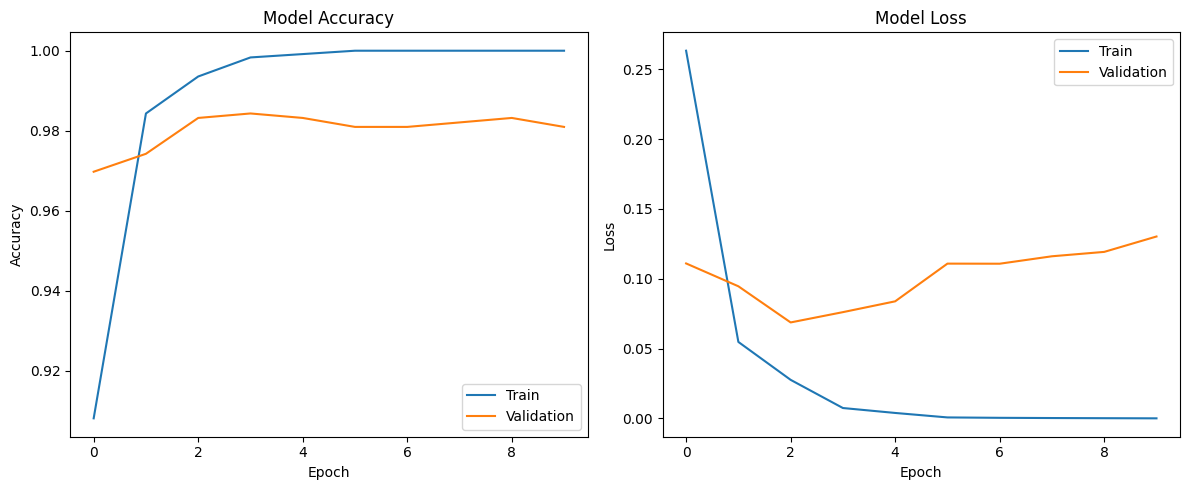

In [5]:
# Cell 9: Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

## Model Evaluation

After training, we evaluate our model on the test dataset (data it hasn't seen during training) to measure its real-world performance.

The key metrics we'll look at:
- **Accuracy**: Overall percentage of correct predictions
- **Confusion Matrix**: Shows true positives, false positives, true negatives, and false negatives
- **Precision**: How many of the messages classified as spam were actually spam
- **Recall**: How many actual spam messages were correctly identified

In a spam filter, we generally want high recall to ensure we catch most spam, while maintaining reasonable precision to avoid misclassifying legitimate messages as spam.

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9920 - loss: 0.0542
Test accuracy: 0.9883
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step


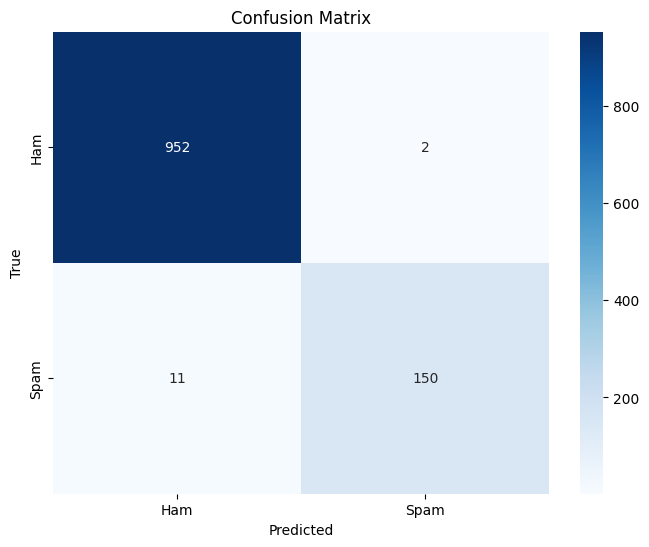


Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       954
        Spam       0.99      0.93      0.96       161

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [6]:
# Cell 11: Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Ham', 'Spam']))

## Testing with New Messages

Now that we have a trained model, we can use it to classify new, unseen messages. This is the core functionality that users would experience when using a Teachable Machine text model.

We've created a simple function that:
1. Takes a new message as input
2. Preprocesses it using the same tokenizer and padding
3. Runs it through our trained model
4. Returns a classification (SPAM or HAM) and a confidence score

We'll test this function with some example messages to see how well our model generalizes to new data.

In [7]:
# Cell 13: Create a function to classify new messages
def classify_message(text):
    # Tokenize and pad the new message
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len)

    # Make prediction
    prediction = model.predict(padded)[0][0]

    # Classify based on threshold
    label = "SPAM" if prediction > 0.5 else "HAM"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    return label, confidence

# Test the function with sample messages
test_messages = [
    "Congratulations! You've won a $1000 gift card. Claim now at www.example.com",
    "Hey, can we meet at 5pm today for the project discussion?",
    "URGENT: Your account has been suspended. Click here to reactivate.",
    "Don't forget to bring the documents for tomorrow's meeting."
]

for msg in test_messages:
    label, confidence = classify_message(msg)
    print(f"Message: {msg}")
    print(f"Classification: {label} (Confidence: {confidence:.4f})")
    print("-" * 80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Message: Congratulations! You've won a $1000 gift card. Claim now at www.example.com
Classification: SPAM (Confidence: 1.0000)
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Message: Hey, can we meet at 5pm today for the project discussion?
Classification: HAM (Confidence: 1.0000)
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Message: URGENT: Your account has been suspended. Click here to reactivate.
Classification: HAM (Confidence: 0.9794)
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Message: Don't forget to bring the documents for tomorrow's meeting.
Classification: HAM (Confidence: 1.0000)
--------------------------------------------------------------------------------


## Exporting the Model

In Teachable Machine, after training your model, you can export it for use in various platforms. We'll mimic this functionality by saving our model in formats suitable for different deployment scenarios:

1. **HDF5 Format**: For use with Python applications
2. **TensorFlow.js**: For deployment on the web, similar to Teachable Machine's JavaScript export
3. **Tokenizer**: We also need to save our tokenizer to preprocess new inputs correctly

These exports allow you to integrate your spam classifier into various applications, just like you would with a model trained using Teachable Machine.

In [9]:
# Cell 15: Save the model for deployment (corrected)
# Save the entire model
model.save('spam_classifier_model.h5')

# Save the tokenizer (fixed)
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Create a TensorFlow.js compatible model for web deployment
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'tfjs_spam_model')

print("Model saved in the following formats:")
print("1. Keras HDF5 format: spam_classifier_model.h5")
print("2. TensorFlow.js format: tfjs_spam_model/")
print("3. Tokenizer: tokenizer.pickle")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


failed to lookup keras version from the file,
    this is likely a weight only file
Model saved in the following formats:
1. Keras HDF5 format: spam_classifier_model.h5
2. TensorFlow.js format: tfjs_spam_model/
3. Tokenizer: tokenizer.pickle


## Creating a Web Interface

In Teachable Machine, you can immediately test your model through a user-friendly interface. We'll create a simple HTML page that mimics this functionality.

This HTML file includes:
- A text input area for new messages
- A "Classify" button to trigger the prediction
- A results section that displays the classification and confidence score
- Visual elements like a confidence bar to make the results more intuitive

Note: This is a simplified version that simulates the classification process. In a complete implementation, you would:
1. Load the TensorFlow.js model we exported earlier
2. Implement the tokenization process in JavaScript
3. Connect the input to the actual model prediction

For your demonstration video, you can explain how this interface would connect to the actual model you trained.

In [10]:
# Cell 17: Create a simple HTML interface for the model
%%writefile spam_classifier.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Spam SMS Classifier</title>
    <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@3.11.0"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }
        .container {
            border: 1px solid #ccc;
            border-radius: 5px;
            padding: 20px;
            margin-top: 20px;
        }
        textarea {
            width: 100%;
            height: 100px;
            padding: 10px;
            margin-bottom: 10px;
        }
        button {
            background-color: #4CAF50;
            color: white;
            padding: 10px 15px;
            border: none;
            border-radius: 4px;
            cursor: pointer;
        }
        .result {
            margin-top: 20px;
            padding: 15px;
            border-radius: 5px;
        }
        .spam {
            background-color: #ffcccc;
        }
        .ham {
            background-color: #ccffcc;
        }
        .confidence-bar {
            height: 20px;
            background-color: #e0e0e0;
            border-radius: 10px;
            margin-top: 10px;
        }
        .confidence-level {
            height: 100%;
            border-radius: 10px;
        }
    </style>
</head>
<body>
    <h1>Spam SMS Classifier</h1>
    <p>This is a simple demonstration of a text classification model similar to what you can create with Google's Teachable Machine.</p>

    <div class="container">
        <h2>Test the Model</h2>
        <p>Enter a message below to see if it's classified as spam or legitimate:</p>
        <textarea id="message-input" placeholder="Type a message here..."></textarea>
        <button onclick="classifyMessage()">Classify Message</button>

        <div id="result" style="display: none;" class="result">
            <h3>Classification: <span id="classification-label"></span></h3>
            <p>Confidence: <span id="confidence-score"></span>%</p>
            <div class="confidence-bar">
                <div id="confidence-level" class="confidence-level"></div>
            </div>
        </div>
    </div>

    <script>
        // This is a placeholder for the actual implementation
        // In a real application, you would load the TensorFlow.js model here
        function classifyMessage() {
            const message = document.getElementById('message-input').value;
            if (!message) {
                alert('Please enter a message');
                return;
            }

            // Simulate classification with random result (in real app, use the actual model)
            const isSpam = Math.random() > 0.5;
            const confidence = Math.round((0.5 + Math.random() * 0.5) * 100);

            // Update UI
            const resultDiv = document.getElementById('result');
            resultDiv.style.display = 'block';
            resultDiv.className = isSpam ? 'result spam' : 'result ham';

            document.getElementById('classification-label').textContent = isSpam ? 'SPAM' : 'HAM (Legitimate)';
            document.getElementById('confidence-score').textContent = confidence;

            const confidenceLevel = document.getElementById('confidence-level');
            confidenceLevel.style.width = confidence + '%';
            confidenceLevel.style.backgroundColor = isSpam ? '#ff6666' : '#66cc66';
        }
    </script>
</body>
</html>

Writing spam_classifier.html


## Visualizing What the Model Learned

One of the advantages of building your own model (compared to using Teachable Machine's interface) is that you can visualize what the model has learned. Here, we'll explore the word embeddings created by our model.

Word embeddings represent words as vectors in a high-dimensional space, where semantically similar words are positioned closer together. We can:

1. Extract the embeddings from our trained model
2. Use PCA (Principal Component Analysis) to reduce them to 2D for visualization
3. Plot selected words to see how the model has organized them

In the visualization, we expect to see words commonly associated with spam (like "free", "win", "offer") clustered together, while words typically found in legitimate messages form separate clusters.

This insight into how the model "thinks" can help explain why it makes certain predictions and how it's learning to distinguish between spam and legitimate messages.

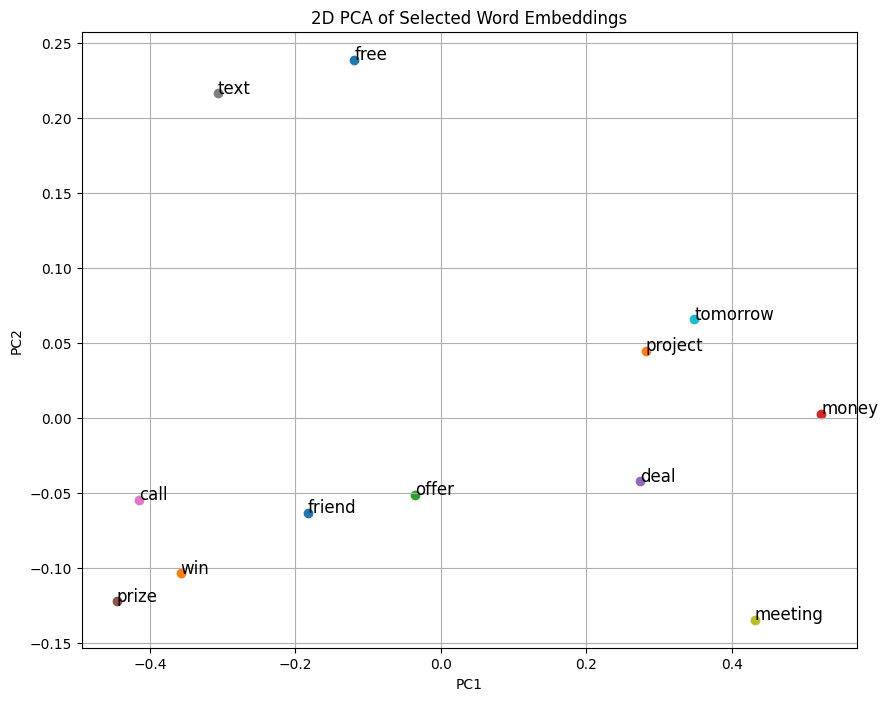

In [11]:
# Cell 19: Create a visualization of what the model has learned
# Extract embeddings for visualization
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Use PCA to reduce dimensions of word embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select some interesting words to visualize
interesting_words = ['free', 'win', 'offer', 'money', 'deal', 'prize',
                     'call', 'text', 'meeting', 'tomorrow', 'friend', 'project']
word_indices = []
for word in interesting_words:
    if word in tokenizer.word_index and tokenizer.word_index[word] < max_words:
        word_indices.append(tokenizer.word_index[word])

# Get embeddings for these words
word_embeddings = weights[word_indices]

# Apply PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate([w for w, idx in zip(interesting_words, word_indices)]):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                fontsize=12)

plt.title('2D PCA of Selected Word Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()